In [5]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabaz_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline  

In [2]:
import pandas as pd
from sklearn import preprocessing
df = pd.read_pickle('f.pkl')
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Data columns (total 25 columns):
town         565 non-null object
county       565 non-null object
state        565 non-null object
FIPS         565 non-null object
city_town    565 non-null object
0            565 non-null float64
1            565 non-null float64
2            565 non-null float64
3            565 non-null float64
4            565 non-null float64
5            565 non-null float64
6            565 non-null float64
7            565 non-null float64
8            565 non-null float64
9            565 non-null float64
10           565 non-null float64
11           565 non-null float64
12           565 non-null float64
13           565 non-null float64
14           565 non-null float64
15           565 non-null float64
16           565 non-null float64
17           565 non-null float64
18           565 non-null float64
19           565 non-null float64
dtypes: float64(20), object(5)
memory usage: 114.8

In [ ]:
### select a specific set of columns to cluster on
#df2 = pd.concat([df['p_malepop'],df['p_white'], df['p_latino']], axis=1)

#df2.head()

In [3]:
X = df.iloc[:,5:].values
#X = df2.values

X = preprocessing.scale(X)
type(X)

numpy.ndarray

In [1]:
pca = PCA(n_components=58)
X_r = pca.fit(X).transform(X)
sum(pca.explained_variance_ratio_)

NameError: name 'PCA' is not defined

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.338019736342 
The Calinski Harabasz score is : 119.995471151


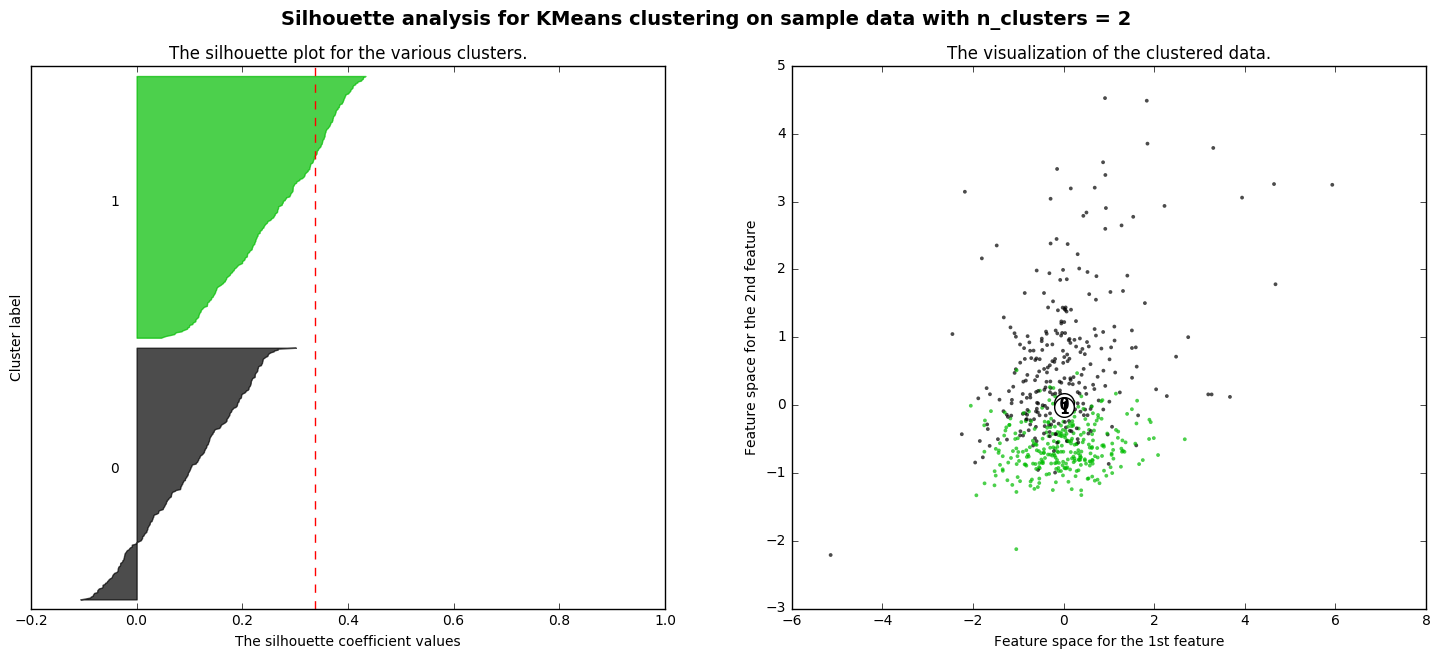

For n_clusters = 4 The average silhouette_score is : 0.22138372448 
The Calinski Harabasz score is : 96.7874090677


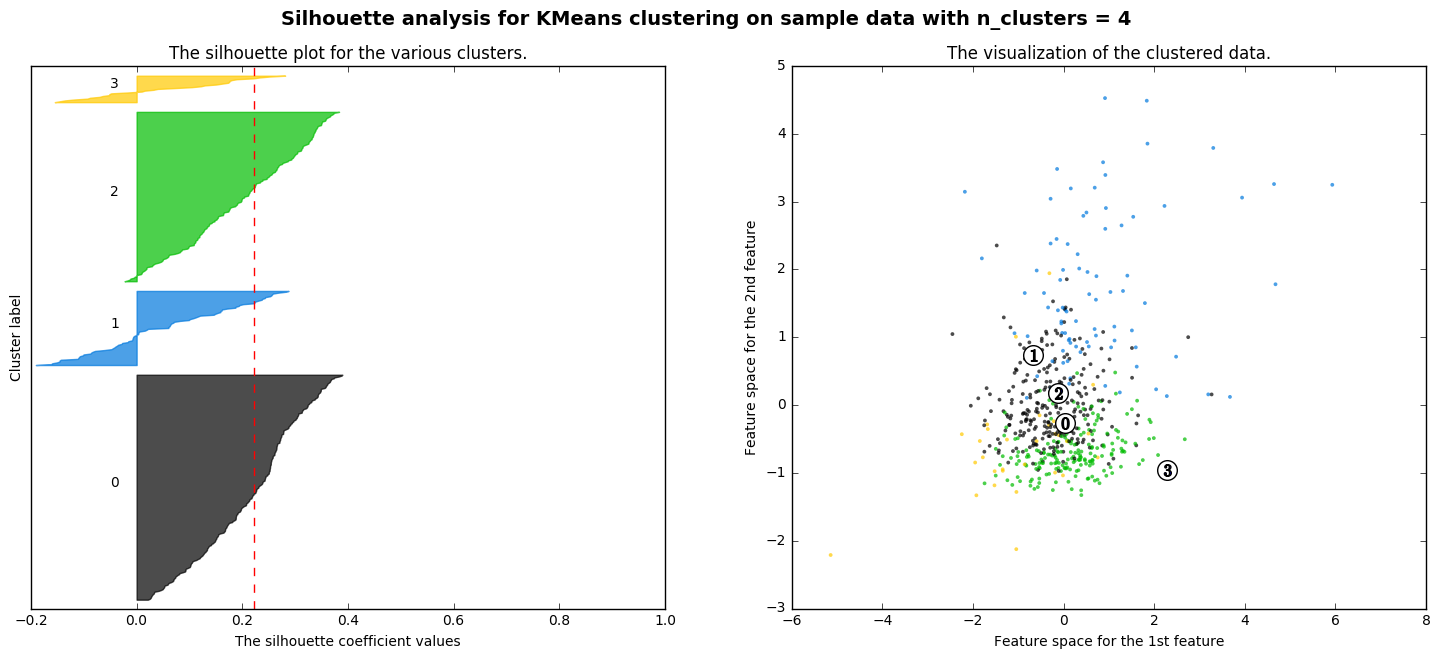

For n_clusters = 7 The average silhouette_score is : 0.171726522834 
The Calinski Harabasz score is : 79.5085032258


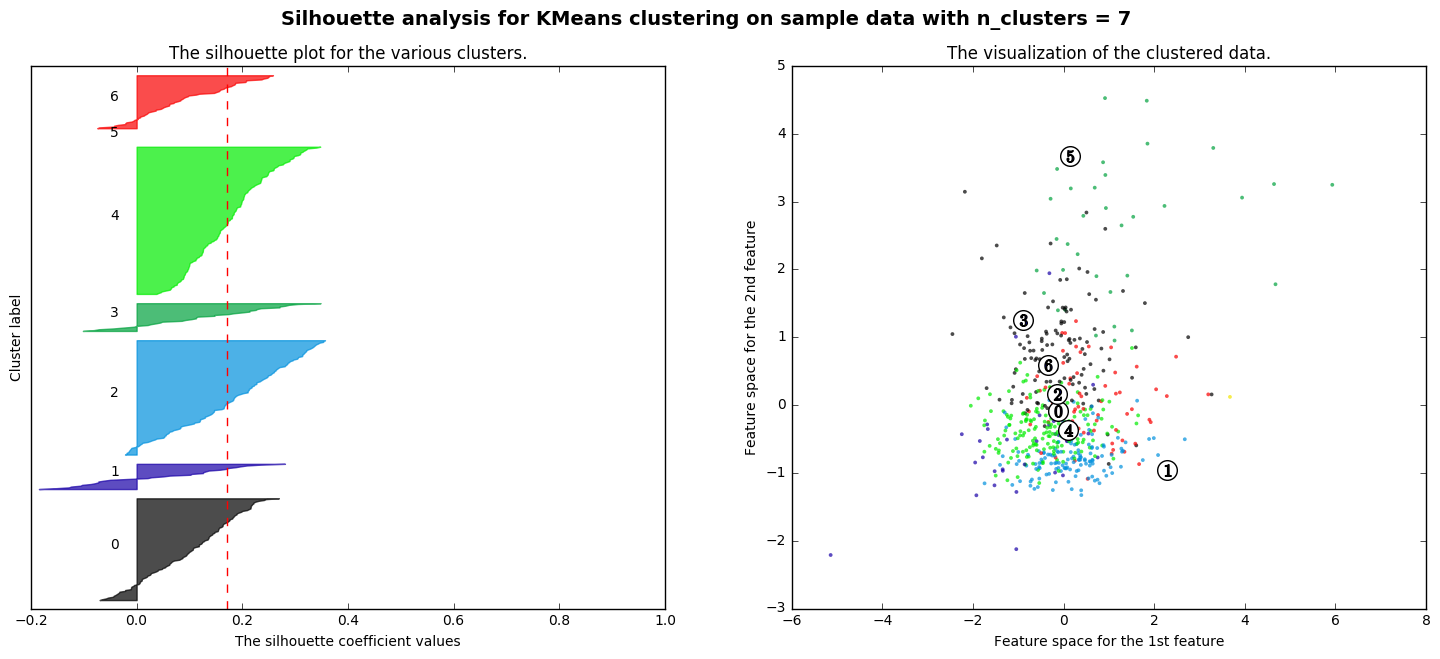

In [7]:
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [2, 4, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=1000)
    cluster_labels = clusterer.fit_predict(X)
    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='correlation')
    ch_score = calinski_harabaz_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg,
         "\nThe Calinski Harabasz score is :", ch_score)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
       # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 1], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=70)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    
    

In [13]:
for i in zip(df['town'],cluster_labels):
    print(i)

('Absecon city', 39)
('Atlantic City city', 7)
('Brigantine city', 10)
('Buena borough', 18)
('Buena Vista township', 23)
('Corbin City city', 4)
('Egg Harbor township', 39)
('Egg Harbor City city', 8)
('Estell Manor city', 4)
('Folsom borough', 4)
('Galloway township', 18)
('Hamilton township', 18)
('Hammonton town', 18)
('Linwood city', 39)
('Longport borough', 37)
('Margate City city', 37)
('Mullica township', 23)
('Northfield city', 39)
('Pleasantville city', 8)
('Port Republic city', 4)
('Somers Point city', 18)
('Ventnor City city', 8)
('Weymouth township', 23)
('Allendale borough', 2)
('Alpine borough', 35)
('Bergenfield borough', 15)
('Bogota borough', 15)
('Carlstadt borough', 15)
('Cliffside Park borough', 33)
('Closter borough', 11)
('Cresskill borough', 11)
('Demarest borough', 36)
('Dumont borough', 15)
('East Rutherford borough', 33)
('Edgewater borough', 31)
('Elmwood Park borough', 15)
('Emerson borough', 2)
('Englewood city', 33)
('Englewood Cliffs borough', 36)
('Fair